In [1]:
import importlib
#import utils
#importlib.reload(utils)

from utils import extract_pool
from tqdm import tqdm 
import utils.optim_utils
from utils.data_utils import load_obj, SAVE_DIR, UD_PARENT, RESULTS_DIR, LEX_PATH_SET, save_obj
importlib.reload(utils.optim_utils)
from utils.optim_utils import optim, optim_pool
import torch 
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import pdist, squareform
import os
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl

/usr/local/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


Loading lookup from /usr/local/lib/python3.7/site-packages/brainio_collection/lookup.csv


/usr/local/lib/python3.7/site-packages/brainio_base/assemblies.py:224: FutureWarning: The inplace argument has been deprecated and will be removed in a future version of xarray.
  xr_data.set_index(append=True, inplace=True, **coords_d)


In [2]:
torch.cuda.get_device_name(0)

'GeForce GTX TITAN X'

# Inspect the optimization results

In [3]:
extract_id=['group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False']
optim_id=['coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=25-n_init=1-run_gpu=True',
          'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=50-n_init=1-run_gpu=True',
          'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=75-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=100-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=125-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=150-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=175-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=200-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=250-n_init=1-run_gpu=True',
         'coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=300-n_init=1-run_gpu=True']

In [4]:
optim_files=[]
optim_results=[]
for ext in extract_id:
    for optim in optim_id:
        optim_file=os.path.join(RESULTS_DIR,f"results_{ext}_{optim}.pkl")
        optim_files.append(optim_file)
        optim_results.append(load_obj(optim_file))

loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=25-n_init=1-run_gpu=True.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=50-n_init=1-run_gpu=True.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=75-n_init=1-run_gpu=True.pkl
loading /om/user/ehoseini/MyData/sent_sampling/results/results_group=best_performing_pereira_1-dataset=ud_sentencez_token_filter_v3-activation-bench=None-ave=False_coordinate_ascent_eh-obj=D_s-n_iter=1000-n_samples=100-n_init=1-run_gpu=True.pkl
loading /om/user/ehosei

1.14544
1.13281
1.12622
1.12106
1.11743
1.11465
1.11114
1.10928
1.10534
1.10215


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator


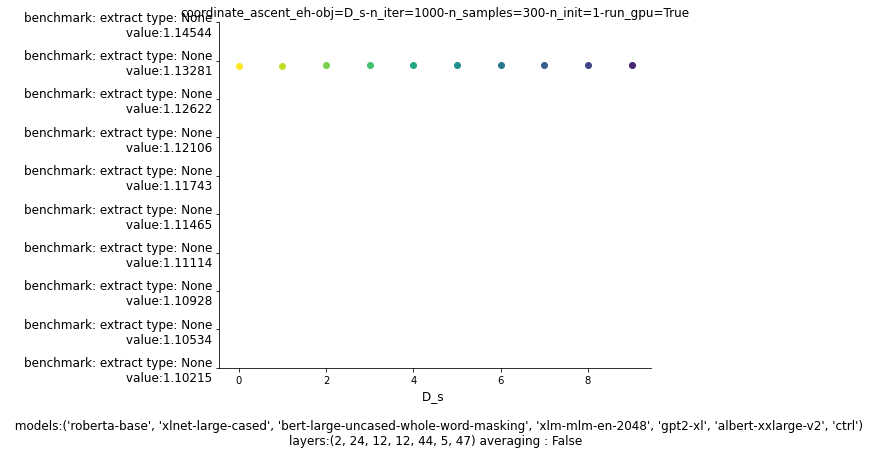

In [5]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

cmap=cm.get_cmap('viridis_r')

alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
tick_l=[]
tick=[]
for idx, res in enumerate(optim_results):
    ax.scatter(idx,res['optimized_d'],color=alph_col[[idx],:],label=res['optimizatin_name'])
    ext_obj=extract_pool[res['extractor_name']]()
    str_val="{:.5f}".format(res['optimized_d'])
    print(f"{str_val}")
    tick_l.append(f"benchmark: extract type: {ext_obj.extract_benchmark}\n value:{str_val}")
    tick.append(idx)
ax.set_xlabel(f"D_s \n\n  models:{ext_obj.model_spec}\nlayers:{ext_obj.layer_spec} averaging : {ext_obj.average_sentence}",fontsize=12)
ax.set_yticklabels(tick_l,fontsize=12)
ax.set_yticks(tick)
ax.set_title(res['optimizatin_name'],fontsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
#ax.legend(bbox_to _anchor=(1.1, .85), frameon=True,fontsize=12)
ax.invert_yaxis()
#fig.savefig(os.path.join(Analysis_path,'DV_test_gamma_alpha_is_0.pdf'))

In [6]:
D_s=[x['optimized_d'] for x in optim_results]
x_bar=[len(x['optimized_S']) for x in optim_results]

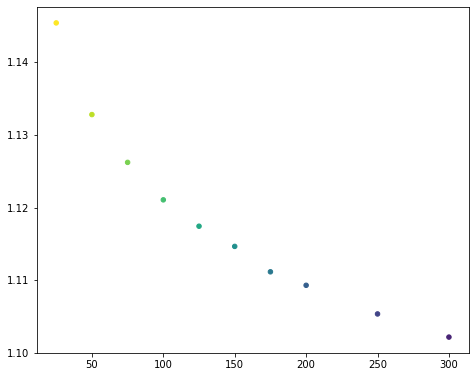

In [8]:
test=extract_pool[extract_id[0]]()
test.load_dataset()
test()
optim_name='coordinate_ascent_eh-obj=D_s-n_iter=50-n_samples=25-n_init=1-run_gpu=True'
optim_obj=optim_pool[optim_name]()
optim_obj.load_extractor(test)
optim_obj.precompute_corr_rdm_on_gpu()

loading /om/user/ehoseini/MyData/Universal Dependencies 2.6/ud_sentencez_data_token_filter_v3_no_dup.pkl


934it [00:00, 253837.88it/s]
934it [00:00, 242733.75it/s]
935it [00:00, 228815.81it/s]
934it [00:00, 232009.47it/s]
934it [00:00, 231297.16it/s]
935it [00:00, 195380.34it/s]
934it [00:00, 197802.57it/s]
934it [00:00, 228584.43it/s]
935it [00:00, 211948.02it/s]


extracting network activations for roberta-base
ud_sentencez_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_roberta-base_layer_2_activation_ave_False.pkl
adding activations to set
extracting network activations for xlnet-large-cased
ud_sentencez_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_xlnet-large-cased_layer_24_activation_ave_False.pkl
adding activations to set
extracting network activations for bert-large-uncased-whole-word-masking
ud_sentencez_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl already exists, loading...
loading /om/user/ehoseini/MyData/sent_sampling/ud_sentencez_token_filter_v3_bert-large-uncased-whole-word-masking_layer_12_activation_ave_False.pkl
adding activations to set
extracting n

In [9]:

n_rand_try=1000
D_s_Rand=[]
for x in x_bar:
    d_s_rand=[]
    for idx,_ in tqdm(enumerate(range(n_rand_try))):
        S_list=np.random.choice(optim_obj.N_S, size=x, replace=False)
        d_s_rand.append(optim_obj.gpu_object_function(S_list))
    D_s_Rand.append(d_s_rand)

1000it [00:02, 443.72it/s]
1000it [00:01, 736.72it/s]
1000it [00:01, 737.11it/s]
1000it [00:01, 725.82it/s]
1000it [00:01, 671.25it/s]
1000it [00:01, 645.37it/s]
1000it [00:01, 616.95it/s]
1000it [00:01, 578.25it/s]
1000it [00:01, 652.42it/s]
1000it [00:01, 657.15it/s]


Text(0.5, 1.0, 'random samples')

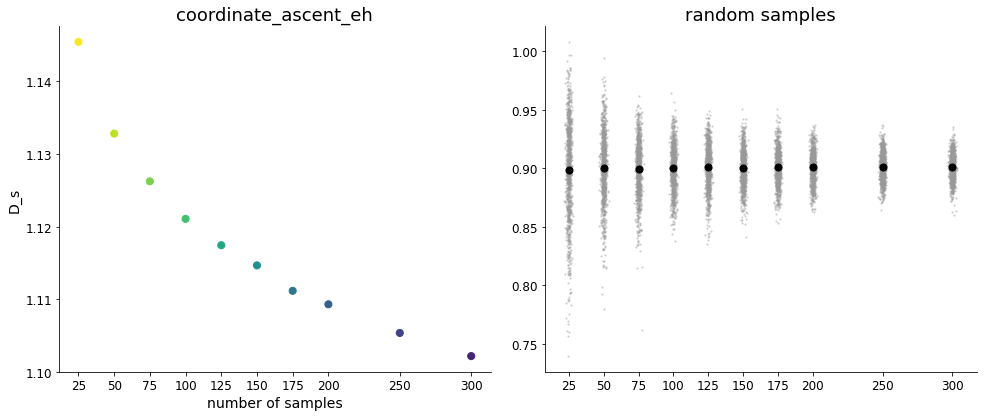

In [10]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
cmap=cm.get_cmap('viridis_r')
alph_col=cmap(np.divide(range(len(optim_results)),len(optim_results)))
ax.scatter(x_bar,D_s,c=alph_col,s=50)
right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_xlabel('number of samples',fontsize=14)
ax.set_ylabel('D_s',fontsize=14)

ax.set_title('coordinate_ascent_eh',fontsize=18)
ax = fig.add_axes([.55,.1,.4,.6])
for idx, x in enumerate(x_bar):
    ax.scatter(np.random.normal(size=(np.asarray(D_s_Rand[idx]).shape))+x,np.asarray(D_s_Rand[idx]),color=(.6,.6,.6),s=2,alpha=.3)
    ax.scatter(x,np.asarray(D_s_Rand[idx]).mean(),color=(0,0,0),s=50)
right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_title('random samples',fontsize=18)

# determine how much filtering affect the score


In [25]:
optimized_Ss=[x['optimized_S'] for x in optim_results]


In [23]:
n_rand_try=1000
D_s_selection=[]
for optim_s in optimized_Ss[-3:]:
    d_s_selec=[]
    for idx,_ in tqdm(enumerate(range(n_rand_try))):
        S_list=np.random.choice(optim_s, size=200, replace=False)
        d_s_selec.append(optim_obj.gpu_object_function(S_list))
    D_s_selection.append(d_s_selec)

1000it [00:01, 549.45it/s]
1000it [00:01, 611.92it/s]
1000it [00:01, 610.95it/s]


In [31]:
D_s_select=D_s[-3:]
x_bar_select=x_bar[-3:]
alph_col_select=alph_col[-3:,:]
alph_col_select

array([[0.206756, 0.371758, 0.553117, 1.      ],
       [0.253935, 0.265254, 0.529983, 1.      ],
       [0.282623, 0.140926, 0.457517, 1.      ]])

Text(0.5, 1.0, 'Ds for a 200 subsample withing the full set')

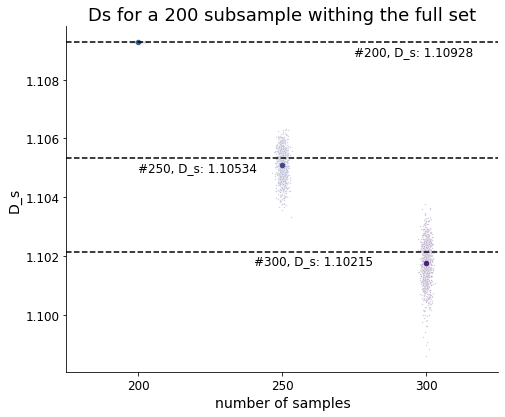

In [64]:
fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])

right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_xlabel('number of samples',fontsize=14)
ax.set_ylabel('D_s',fontsize=14)
ax.set_xlim((175,325))



for idx, x in enumerate(x_bar_select):
    ax.scatter(np.random.normal(size=(np.asarray(D_s_selection[idx]).shape))+x,np.asarray(D_s_selection[idx]),color=alph_col_select[idx,:],edgecolors='w',s=2,alpha=.3)
    ax.scatter(x,np.asarray(D_s_selection[idx]).mean(),color=alph_col_select[idx,:],s=20)

#ax.scatter(x_bar_select,D_s_select,c=alph_col_select,s=50)

[ax.plot(ax.get_xlim(),d_s+np.multiply(0,ax.get_xlim()),'k--') for d_s in D_s_select]

str_val=["{:.5f}".format(x) for x in D_s_select]

[ax.text(x,D_s_select[idx]-0.0001,f'#{x_bar_select[idx]}, D_s: {str_val[idx]}',va='top',fontsize=12) for idx,x in enumerate([275,200,240])]
right_side = ax.spines["right"]
right_side. set_visible(False)
right_side = ax.spines["top"]
right_side. set_visible(False)
ax.set_xticks(x_bar_select)
ax.tick_params(axis='x', labelsize= 12)
ax.tick_params(axis='y', labelsize= 12)
ax.set_title('Ds for a 200 subsample withing the full set',fontsize=18)

In [50]:
ax.get_xlim()

(191.58239278004558, 308.3085002587727)

In [ ]:
S_opt_d, DS_opt_d=optim_obj()

In [ ]:
S_list=np.random.choice(optim_obj.N_S, size=300, replace=False)

In [ ]:
%timeit -n 5 optim_obj.gpu_object_function(S_list)

In [ ]:
%timeit -n 5 optim_obj.mod_objective_function(S_list)

In [110]:
optim_name='coordinate_ascent_eh-obj=D_s-n_iter=50-n_samples=25-n_init=1-run_gpu=True'
optim_obj=optim_pool[optim_name]()
optim_obj.load_extractor(test)



In [111]:
d_s_rand_cpu=[]
for idx,_ in tqdm(enumerate(range(1000))):
        S_list=np.random.choice(optim_obj.N_S, size=25, replace=False)
        d_s_rand_cpu.append(optim_obj.mod_objective_function(S_list))

1000it [00:05, 174.34it/s]


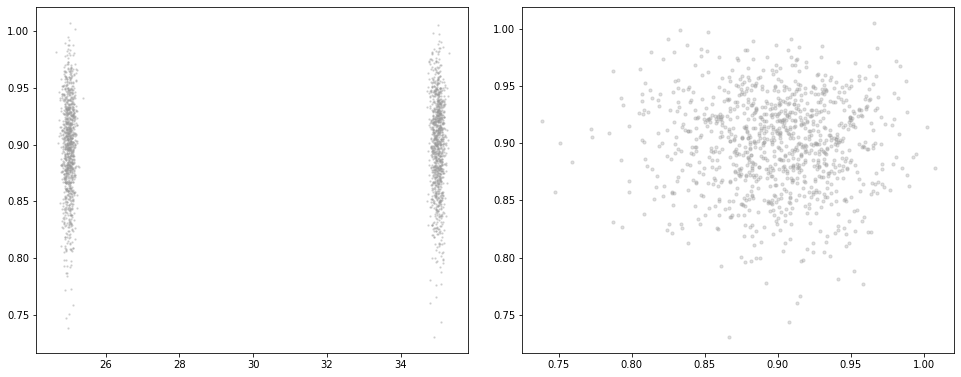

In [114]:

fig = plt.figure(figsize=[15,8])
ax = fig.add_axes([.1,.1,.4,.6])
ax.scatter(np.random.normal(size=(np.asarray(d_s_rand_cpu).shape))/10+25,np.asarray(d_s_rand_cpu),color=(.6,.6,.6),s=2,alpha=.3)
ax.scatter(np.random.normal(size=(np.asarray(D_s_Rand[0]).shape))/10+35,np.asarray(D_s_Rand[0]),color=(.6,.6,.6),s=2,alpha=.3)
ax = fig.add_axes([.55,.1,.4,.6])
ax.scatter(np.asarray(d_s_rand_cpu),np.asarray(D_s_Rand[0]),color=(.6,.6,.6),s=10,alpha=.3)

In [ ]:
gpu_optim=[]
cpu_optim=[]
for k in range(10):
    S_list=np.random.choice(optim_obj.N_S, size=300, replace=False)
    gpu_optim.append(optim_obj.gpu_object_function(S_list))
    cpu_optim.append(optim_obj.mod_objective_function(S_list))

In [ ]:
dval,X_corr_sample,XY_sample=optim_obj.gpu_object_function_debug(S_list)

In [ ]:
plt.imshow(XY_sample[1].cpu())

In [ ]:
k=6
test_np=np.array([optim_obj.activations[k]['activations'][int(s.mean())] for s in S_list])
D_vall=squareform(pdist(test_np,'correlation'))
change=D_vall-XY_sample[k].cpu().numpy()
plt.imshow(change)

plt.colorbar()



In [ ]:
X_corr_sample.cpu().numpy().transpose()

In [ ]:
patterns_list = [np.stack([x['activations'][i] for i in S_list]) for x in optim_obj.activations]

In [ ]:
test_np=np.stack([pdist(x,'correlation') for x in patterns_list])


In [ ]:
plt.plot(test_np.transpose()-X_corr_sample.cpu().numpy().transpose())

In [ ]:
plt.plot(test_np.transpose()[:,0],X_corr_sample.cpu().numpy().transpose()[:,0])

In [ ]:
device =torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.get_device_name(0)
torch.backends.cudnn.deterministic = True
torch.set_deterministic(True)
torch.__version__
torch.set_printoptions(precision=10)

In [ ]:

activation_list=[torch.tensor(x['activations'],dtype=float,device=device,requires_grad=False) for x in optim_obj.activations]

In [ ]:
S_list=np.random.choice(optiS, size=n, replace=False)

In [ ]:
X=torch.nn.functional.normalize(test_data.squeeze())
X=(X-X.mean(axis=1,keepdim=True))
X=torch.nn.functional.normalize(X)
XY_corr=torch.tensor(1,device=device,dtype=float)-torch.mm(X,torch.transpose(X,1,0))

In [ ]:
del XY_corr
XY_corr=pt_create_corr_rdm_short(test_data.squeeze(),device=device)

In [ ]:

X_list=[torch.nn.functional.normalize(x.squeeze()) for x in activation_list]
X_list=[(X-X.mean(axis=1,keepdim=True)) for X in X_list]
X_list=[torch.nn.functional.normalize(X) for X in X_list]
XY_corr_list=[torch.tensor(1,device=device,dtype=float)-torch.mm(X,torch.transpose(X,1,0)) for X in X_list]

In [ ]:
samples=(torch.randint(0, 1000, (300,),dtype=torch.long,device=device))
pairs=torch.combinations(samples, with_replacement=False)

In [ ]:
XY_corr_sample=[XY_corr[pairs[:,0],pairs[:,1]] for XY_corr in XY_corr_list]
XY_corr_sample_tensor=torch.stack(XY_corr_sample)
XY_corr_sample_tensor=torch.transpose(XY_corr_sample_tensor,1,0)
if XY_corr_sample_tensor.shape[1]<XY_corr_sample_tensor.shape[0]:
    XY_corr_sample_tensor=torch.transpose(XY_corr_sample_tensor,1,0)
assert(XY_corr_sample_tensor.shape[1]>XY_corr_sample_tensor.shape[0])

In [ ]:
%timeit -n 5 [XY_corr[pairs[:,0],pairs[:,1]] for XY_corr in XY_corr_list]

%timeit -n 5 [torch.index_select(XY_corr,0,samples) for XY_corr in XY_corr_list]

In [ ]:
samples=(torch.randint(0, 1000, (300,),dtype=torch.long,device=device))
pairs=torch.combinations(samples, with_replacement=False)
XY_sample_1= torch.index_select(XY_corr,0,samples)
XY_sample_1=torch.index_select(XY_sample_1,1,samples)

%timeit -n 5 torch.index_select(XY_corr,0,samples)

In [ ]:
D_val=pt_create_corr_rdm_short(XY_corr_sample_tensor,device=device)
%timeit -n 5 pt_create_corr_rdm_short(XY_corr_sample_tensor,device=device)
D_val

In [ ]:
N1=D_val.shape[1]
correction=N1*N1/(N1*(N1-1)/2)
XY_fix=correction*D_val.mean(dim=(0,1)).unsqueeze(0)
XY_fix

In [ ]:
XY_corr_tensor=torch.stack(XY_corr_list)


In [ ]:
D_vall=squareform(pdist(XY_corr_sample_tensor.cpu().numpy(),'correlation'))


In [ ]:
optim_obj.objective_function()

In [ ]:
S_list=list(samples.cpu().numpy())

In [ ]:
ground_truth=optim_obj.mod_objective_function(S_list)
ground_truth

In [ ]:
plt.imshow(squareform(pdist(test_data.squeeze().cpu()[samples,:].numpy(),'correlation')))

In [ ]:
XY_sample=pt_create_corr_rdm_short(test_data.squeeze()[samples,:])
plt.imshow(XY_sample.cpu())

In [ ]:
plt.imshow(XY_sample_1.cpu())

In [ ]:
torch.tensor(S_list,,dtype=torch.long,device=device)

In [ ]:
plt.plot(pdist(test_data.squeeze().cpu()[samples,:].numpy(),'correlation'))

In [ ]:
plt.plot(val_pairs.cpu())